In [37]:
import json
import projetannuel
import random

with open("../dataset/images_flat_full.json", "r") as dataset:
    data = json.load(dataset)

random.shuffle(data)
data = data[:4000]

imgs_as_lists = [movie["image"] for movie in data]
genres = [movie["genre"] for movie in data]
genres = [s.encode('latin1').decode('utf-8') for s in genres]

In [38]:
imgs_as_lists_train = imgs_as_lists[:3200]
genres_train = genres[:3200]
imgs_as_lists_test = imgs_as_lists[3200:]
genres_test = genres[3200:]

In [3]:
import projetannuel

y = projetannuel.string_labels(genres_train)

model = projetannuel.LinearModel(
    imgs_as_lists_train,
    y
)

In [4]:
model.train_classification(epochs=1_000, learning_rate=0.01, algo="gradient-descent")

In [5]:
y_pred = []
for img in imgs_as_lists_test:
    y_pred.append(model.predict(img))

In [6]:
print(y_pred)

['Drame', 'Crime', 'Action', 'Romance', 'Drame', 'Romance', 'Fantastique', 'ComÃ©die', 'Fantastique', 'Science-Fiction', 'Histoire', 'ComÃ©die', 'Horreur', 'Histoire', 'Animation', 'Guerre', 'Aventure', 'Animation', 'Fantastique', 'Familial', 'MystÃ¨re', 'Western', 'Familial', 'Aventure', 'Science-Fiction', 'ComÃ©die', 'Drame', 'Familial', 'Fantastique', 'Documentaire', 'Drame', 'ComÃ©die', 'Histoire', 'Fantastique', 'MystÃ¨re', 'Drame', 'Familial', 'Animation', 'Romance', 'Horreur', 'MystÃ¨re', 'ComÃ©die', 'Guerre', 'Drame', 'Science-Fiction', 'Familial', 'Science-Fiction', 'Guerre', 'Western', 'Fantastique', 'Aventure', 'Action', 'Histoire', 'Guerre', 'Drame', 'Histoire', 'MystÃ¨re', 'Animation', 'Science-Fiction', 'MystÃ¨re', 'Documentaire', 'Action', 'Romance', 'Horreur', 'ComÃ©die', 'TÃ©lÃ©film', 'Fantastique', 'Fantastique', 'ComÃ©die', 'Fantastique', 'Crime', 'ComÃ©die', 'Histoire', 'Crime', 'Drame', 'Aventure', 'Fantastique', 'Drame', 'Animation', 'Histoire', 'Familial', 'Guerr

In [7]:
projetannuel.accuracy_score(genres_test, y_pred)

0.06375

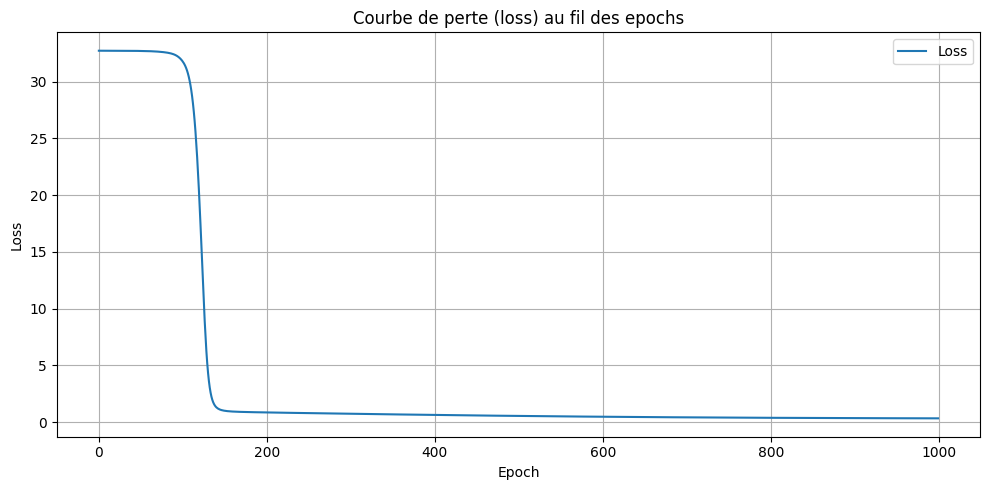

In [8]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 5))
plt.plot(model.loss, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Courbe de perte (loss) au fil des epochs')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## MLP

In [53]:
genres_binary_train = [[0] if x=="Animation" else [1] for x in genres_train]
genres_binary_test = [[0] if x=="Animation" else [1] for x in genres_test]
len(genres_binary)

4000

In [55]:
model = projetannuel.MLP([2, 16, 16, 3])

model.train(imgs_as_lists_train,genres_binary_train,1_000,0.01,True)
y_pred = [model.predict(x,True)[0] for x in imgs_as_lists_test]

PanicException: index out of bounds: the len is 1 but the index is 1

In [41]:
model.save("../saved_model/mlp_images_20x20_1200im_6-4-1npl_1000000ep_0-01lr.json")

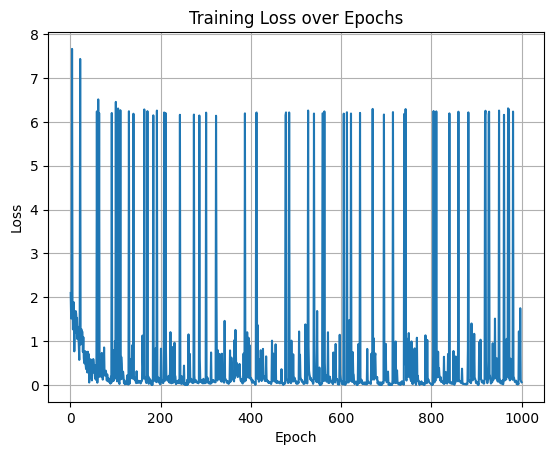

In [42]:
import matplotlib.pyplot as plt

# noraml car affiche pas par epochs

loss = model.loss  
epochs = list(range(1, len(loss) + 1))

plt.plot(epochs, loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs")
plt.grid(True)
plt.show()


In [43]:
print(y_pred)

[0.038917016908769884, 0.03036623087431983, 0.08684643180506492, 0.04834104437360768, 0.03662929602648425, 0.0018940814155051727, -0.002926323097411568, -0.010088693135536283, 0.018365336213438898, -0.06571275305552629, 0.12267082336216395, 0.0018940814155051727, 0.08141668503191198, 0.13018582180916083, 0.027726742407677186, 0.15037029515182607, 0.13603821023373877, 0.1591736944842533, 0.0018940814155051727, 0.15721770490608158, 0.12232731578031882, -0.3678766956893169, -0.02062403806083284, -0.06143591124134696, 0.15037029515182607, 0.031248279812872048, 0.013694002450469967, 0.06674810064225822, -0.019546717887856314, 0.014597081060565108, 0.023068048601061843, 0.0018940814155051727, 0.012699688135076943, 0.07157539361927663, 0.1435362735489443, -0.05463825680061729, 0.005793970409820126, 0.12232731578031882, 0.0036892981281956617, 0.0018940814155051727, 0.03968099753543333, 0.1552802264036666, -0.011516556226262523, -0.06114393615096241, 0.11446064084438669, 0.11027949269085277, 0.

In [44]:
y_pred = [0 if x<0.5 else 1 for x in y_pred]
y_pred.count(1)

0

In [ ]:
projetannuel.accuracy_score(genres_binary_2, y_pred)

0.94275

# RBF

In [17]:
param_grid = {
    'C': [1, 10, 100, 1000],
    'gamma': [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
    "learning_rate": [0.001, 0.01, 0.05, 0.1],
    "epochs": [10000, 50000, 100000],
}

In [18]:
# import itertools

# best_score = 0.0
# best_params = None
# y = projetannuel.string_labels(genres)

# for c, gamma in itertools.product(
#     param_grid["C"],
#     param_grid["gamma"],
# ):
#     model = projetannuel.RBF(
#         imgs_as_lists,
#         y,
#         gamma = gamma,
#         k = c
#     )
#     model.train_classification(epochs=10_000, learning_rate=0.01, algo="gradient-descent")
#     Y_pred = [model.predict(x) for x in imgs_as_lists]
#     acc = projetannuel.accuracy_score(genres, Y_pred)
    
#     print(f"Tested: Gamma={gamma}, C={c}, acc={acc:.4f}")
    
#     if acc > best_score:
#         best_score = acc
#         best_params = (gamma, c)

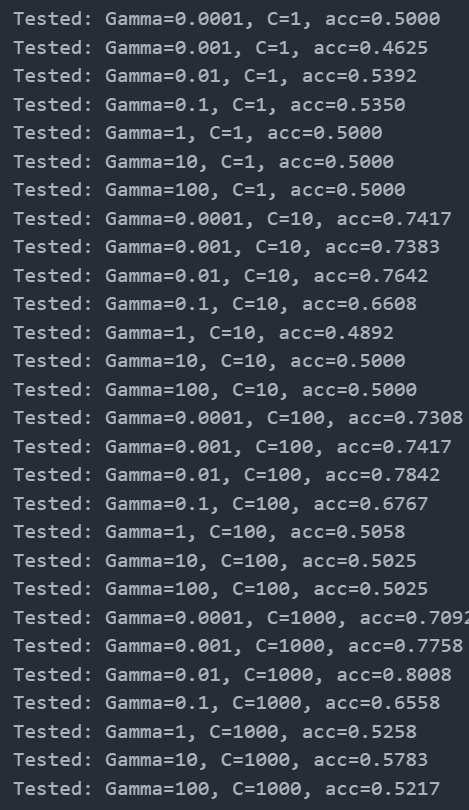

In [57]:
y = projetannuel.string_labels(genres_train)

model = projetannuel.RBF(
    imgs_as_lists_train,
    y,
    gamma = 0.01,
    k = 120
)

model.train_classification(epochs=1_000, learning_rate=1, algo="gradient-descent")

Y_pred = [model.predict(x) for x in imgs_as_lists_test]

# print(f"Accuracy Score : {projetannuel.accuracy_score(list(new_Y), Y_pred)}")

In [58]:
projetannuel.accuracy_score(genres_test, Y_pred)

0.115

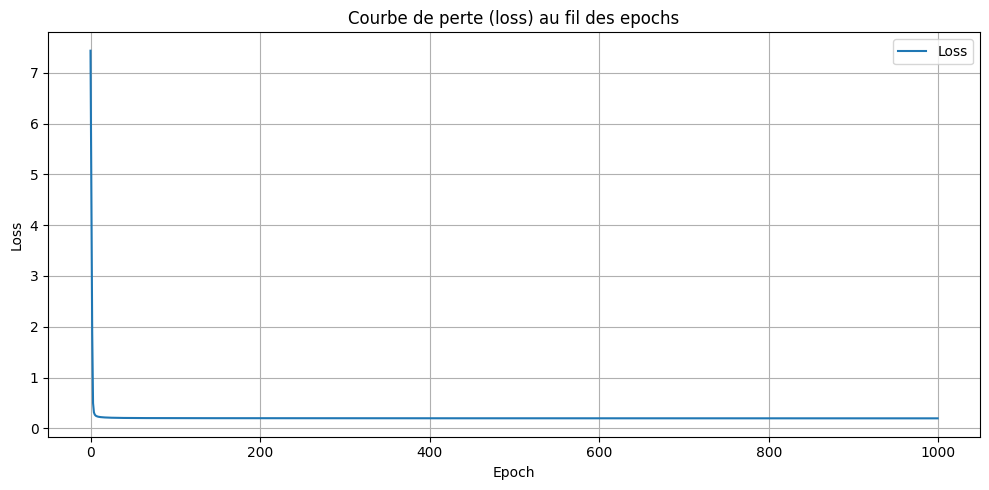

In [59]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 5))
plt.plot(model.loss, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Courbe de perte (loss) au fil des epochs')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()